In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [88]:
# read the dataset
trainingdata = pd.read_csv('./dataset/magic04.csv')
# change the class from letter to number
trainingdata['class'] = np.where(trainingdata['class'] == "g", 1, 0)

labels = trainingdata.columns.values
# get the labels from the data


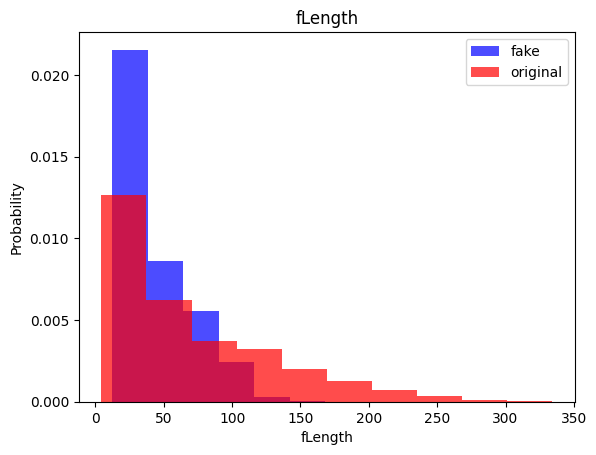

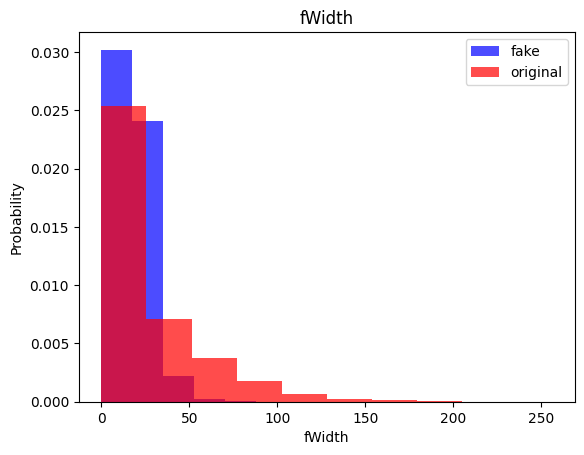

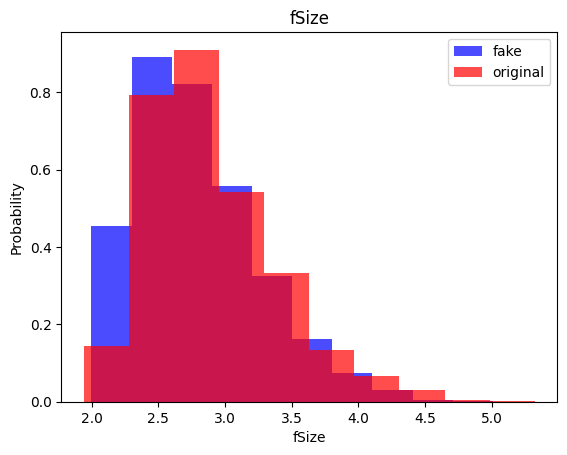

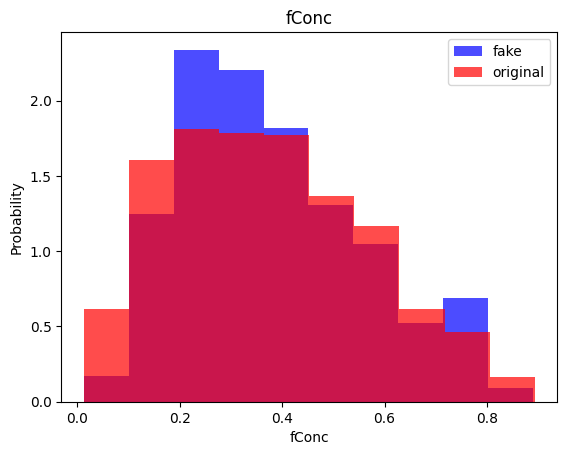

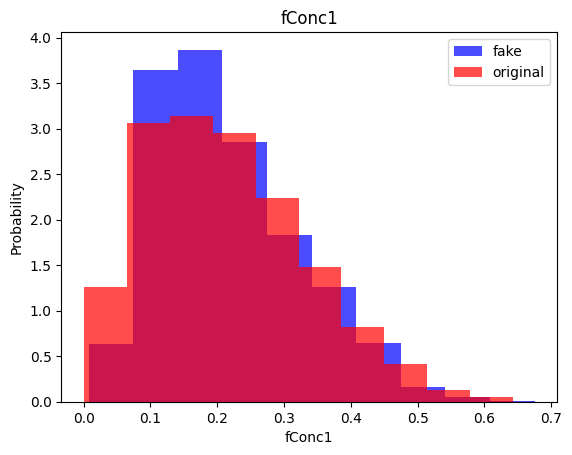

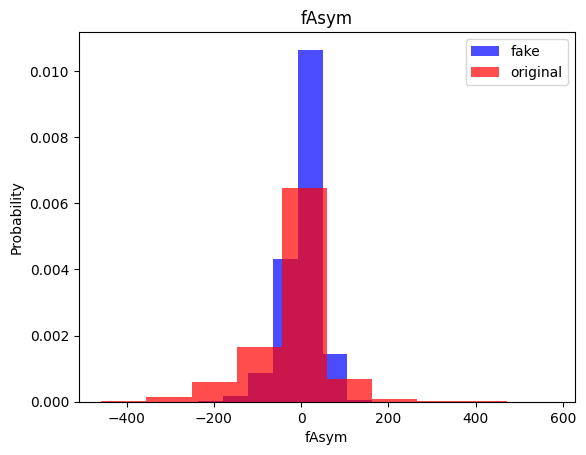

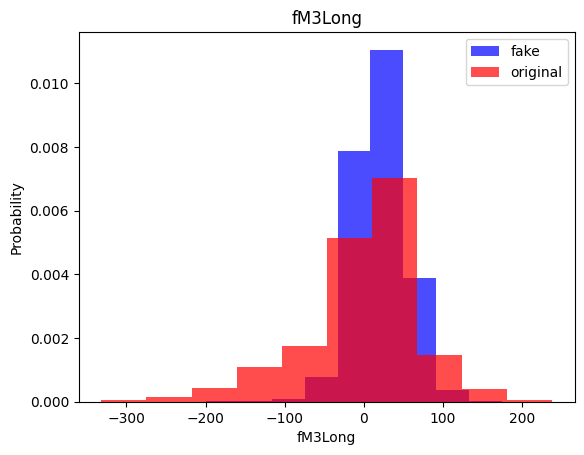

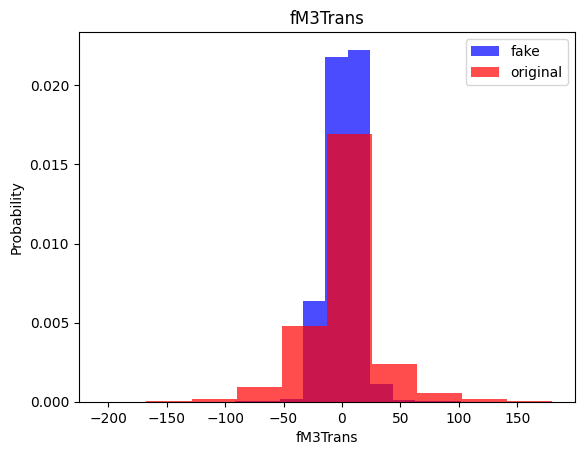

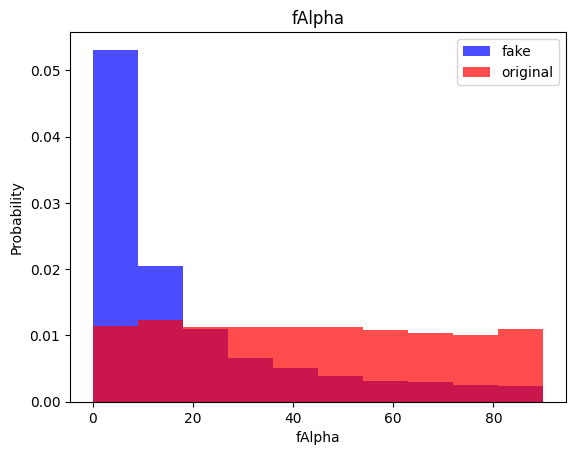

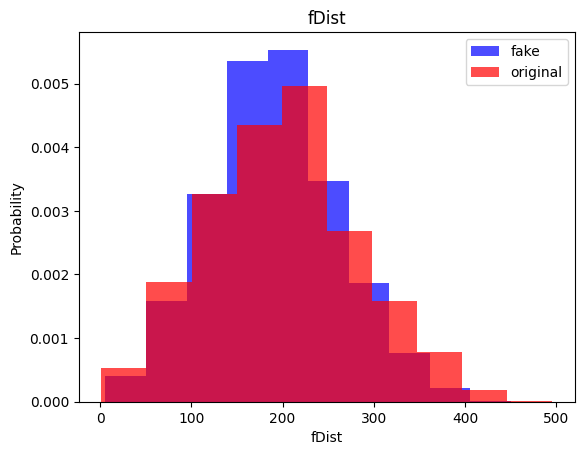

In [89]:
for label in labels[:-1]:
    plt.hist(trainingdata[trainingdata["class"] == 1][label],
             color='blue', label="fake", alpha=0.7, density=True)
    plt.hist(trainingdata[trainingdata["class"] == 0][label],
             color="red", label="original", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()



In [91]:
#separate the column and the row
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scalar = StandardScaler()
    # take x and fit the scalar transform all the values
    X = scalar.fit_transform(X)
    # if one dataset is way much higher than the other one this will make the model to prefer the data with higher number of class
    # so we make the data equal
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    return  X, Y


print("before oversampleing no of gammas is ",
      len(trainingdata[trainingdata["class"] == 1]))  # 7455
print("before oversampleing no of hadron is ",
      len(trainingdata[trainingdata["class"] == 0]))  # 3957


#if the class have different number of training set we use oversampling 
#to normalize so the network wont tilt to one class 
xtrain, ytrain = scale_dataset(trainingdata , oversample=True)


print("after oversampleing no of gammas is ",
      len(ytrain[ytrain == 1]))  # 7455
print("before oversampleing no of hadron is ",
      len(ytrain[ytrain == 0]))  # 3957



before oversampleing no of gammas is  12332
before oversampleing no of hadron is  6688
after oversampleing no of gammas is  12332
before oversampleing no of hadron is  12332


In [92]:
from sklearn.model_selection import train_test_split
#train split test the data 

Xtrain,  Xtest, Ytrain, Ytest = train_test_split(xtrain, ytrain,  random_state=104,
                                                test_size=0.25,
                                                shuffle=True)



In [1]:


svm_model = SVC()
svm_model = svm_model.fit(Xtrain, Ytrain)

y_pred = svm_model.predict(Xtest)


NameError: name 'GaussianNB' is not defined

In [94]:
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3053
           1       0.91      0.86      0.88      3113

    accuracy                           0.89      6166
   macro avg       0.89      0.89      0.89      6166
weighted avg       0.89      0.89      0.89      6166

[[2802  251]
 [ 444 2669]]


In [ ]:
#greedy search here
from sklearn.model_selection import GridSearchCV
